In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton
from scipy.interpolate import interp1d
from scipy.integrate import solve_bvp, solve_ivp
from adjustText import adjust_text

from scipy.optimize import root

plt.style.use('bmh')

plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['legend.fontsize'] = 14
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["figure.titlesize"] = 20


###################################

In [48]:
gamma = 1/2
beta = 8
u_max = 20
rho_max = 1/7.5

c = 0.078 * u_max * rho_max
b = 1/3
l = 1/10
tau = 5

def h(rho):
    output = beta * (rho /(rho_max - rho))**gamma
    return output

def h_prime(rho):
    output =  beta * gamma * (rho /(rho_max - rho))**(gamma-1) * rho_max / ((rho_max - rho)**2)
    return output

def g(y):
    output = np.sqrt(1 + ((y-b)/l)**2 )
    return output

def Q_e(rho):
    output = c * (g(0) + (((g(1) - g(0)) * rho/rho_max)) - g(rho/rho_max))
    return output



def g_prime(y):
    output = (1/l**2) * ((y-b)/ np.sqrt(1 + ((y-b)/l)**2)) 
    return output

def Q_prime(rho):
    output = c * ( ((g(1) - g(0))/rho_max) - (g_prime(rho/rho_max)/rho_max))
    return output

#def U(rho):
#    return Q(rho)/rho

#def U_prime(rho):
#    output = (Q_prime(rho)*rho - Q(rho))/(rho**2)
#    return output


# Velocidad de equilibrio
def U(rho):
    output = Q_e(rho)/rho
    return output


# Derivada de la velocidad de equilibrio
def U_prime(rho):
    output = (Q_prime(rho) - U(rho))/np.sqrt((rho**2 + 1e-5**2))
    return output


# Inversa de U
def U_inv_points(z):
    z = float(z)
    U_to_inv = lambda x: U(x)-z
    
    rho = np.real(root(U_to_inv, 0.5*rho_max).x[0])
    return rho

zs_U = np.linspace(u_max, 0, 50)
U_inv_to_poly = [U_inv_points(z) for z in zs_U]

U_inv = interp1d(zs_U, U_inv_to_poly)


# Inversa de la derivada de Q
def Q_p_inv_points(z):
    z = float(z)
    Q_to_inv = lambda x: Q_prime(x)-z
    
    rho = np.real(root(Q_to_inv, 0.3*rho_max).x[0])
    return rho

rhos = np.linspace(1e-4, rho_max-1e-5, 100_000)
zs_Q = np.linspace(Q_prime(rhos).min(), u_max, 50)
Q_p_inv_to_poly = [Q_p_inv_points(z) for z in zs_Q]

Q_p_inv = interp1d(zs_Q, Q_p_inv_to_poly)

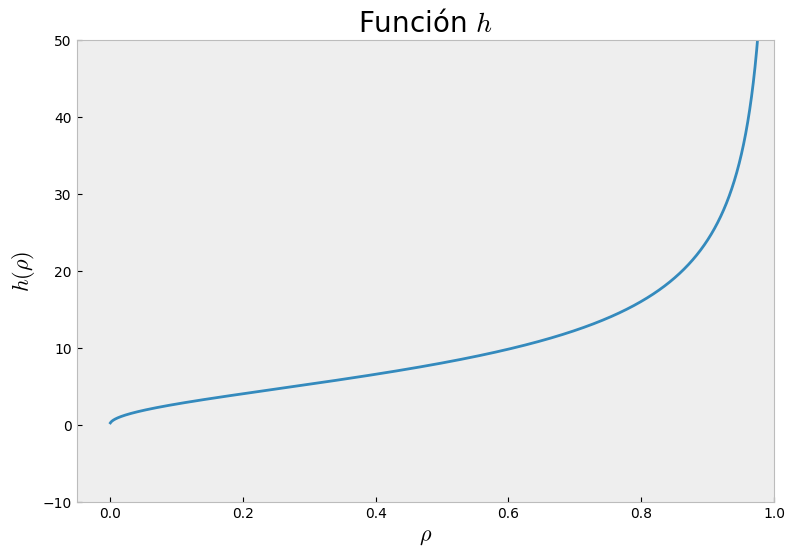

In [49]:
plt.plot(rhos/rho_max, h(rhos))
plt.title(r"Función $h$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$h(\rho)$")
plt.xlim(-0.05, 1)
plt.ylim(-10, 50)
plt.grid()

plt.savefig("Charts/Funciones/h.png")
plt.show()

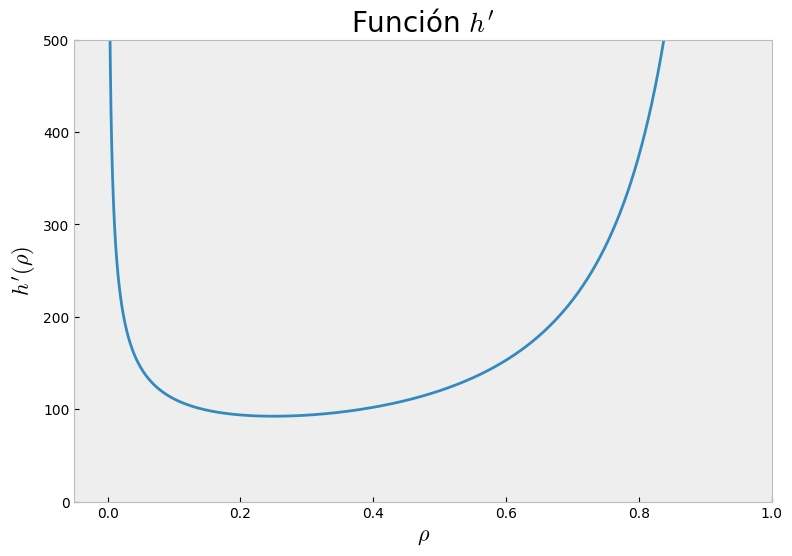

In [50]:
plt.plot(rhos/rho_max, h_prime(rhos))
plt.title(r"Función $h'$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$h'(\rho)$")
plt.xlim(-0.05, 1)
plt.ylim(0, 500)
plt.savefig("Charts/Funciones/h_prima.png")
plt.grid()
plt.show()

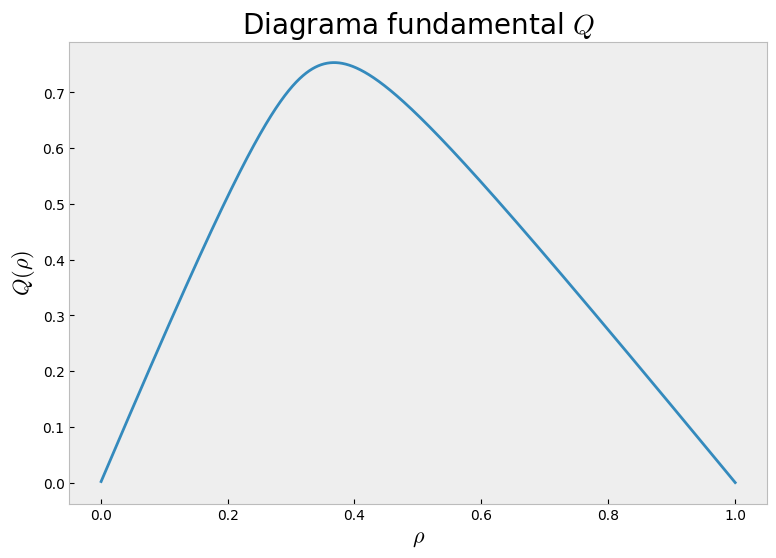

In [51]:
plt.plot(rhos/rho_max, Q_e(rhos))
plt.title(r"Diagrama fundamental $Q$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$Q(\rho)$")
plt.savefig("Charts/Funciones/Q.png")
plt.grid()
plt.show()

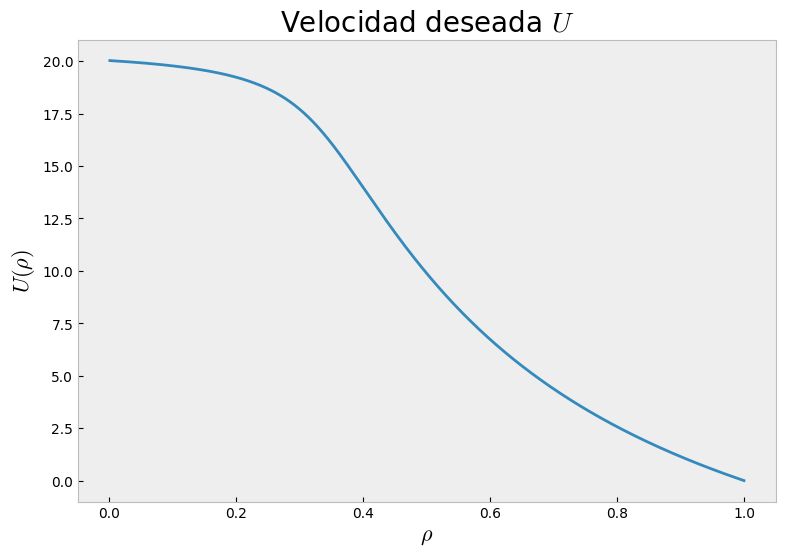

In [52]:
plt.plot(rhos/rho_max, U(rhos))
plt.title(r"Velocidad deseada $U$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$U(\rho)$")
plt.savefig("Charts/Funciones/U.png")
plt.grid()
plt.show()

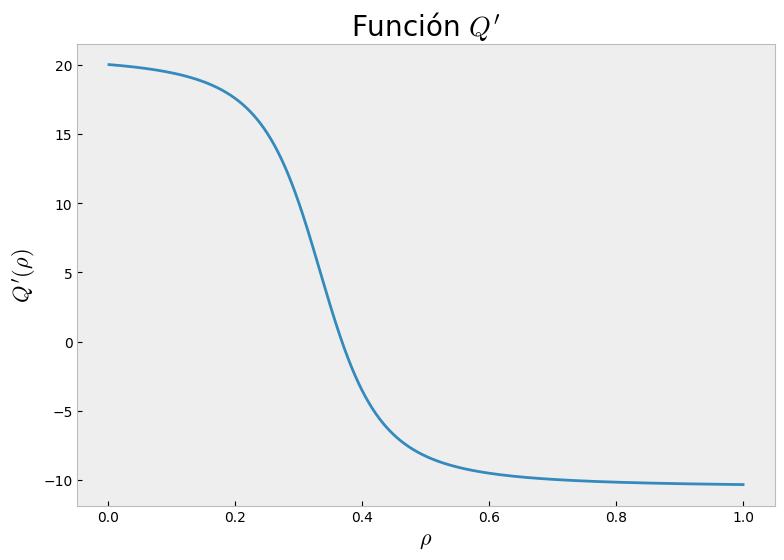

In [53]:
plt.plot(rhos/rho_max, Q_prime(rhos))
plt.title(r"Función $Q'$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$Q'(\rho)$")
plt.savefig("Charts/Funciones/Q_prima.png")
plt.grid()
plt.show()

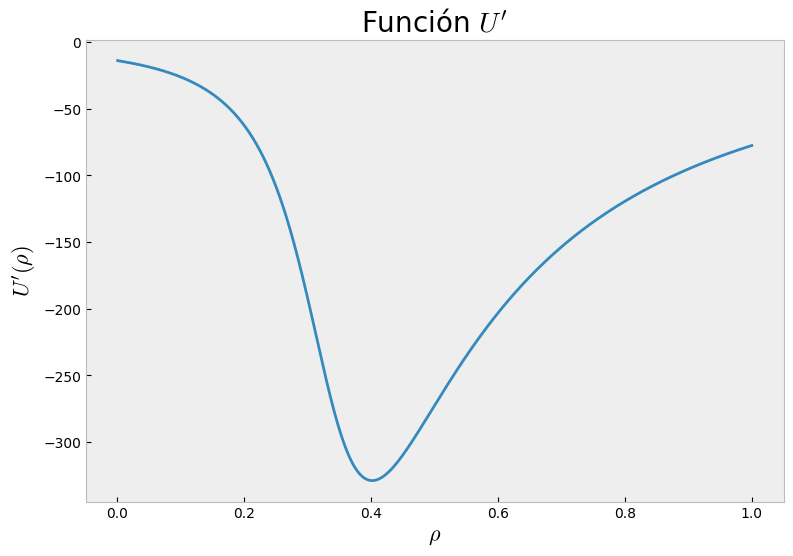

In [54]:
plt.plot(rhos/rho_max, U_prime(rhos))
plt.title(r"Función $U'$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$U'(\rho)$")
plt.savefig("Charts/Funciones/U_prima.png")
plt.grid()
plt.show()

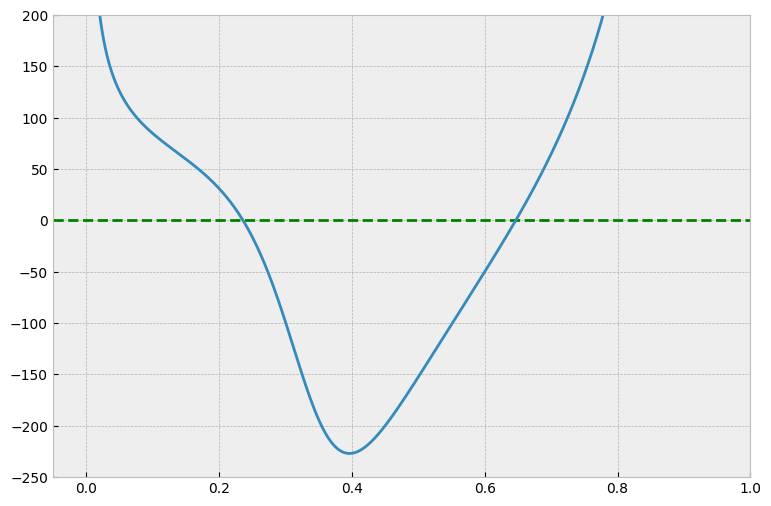

In [55]:
plt.plot(rhos/rho_max, U_prime(rhos) + h_prime(rhos))
plt.xlim(-0.05, 1)
plt.ylim(-250, 200)
plt.hlines(0, -0.05, 1, ls="--", color="g")
plt.show()

In [56]:
def U_inv_points(z):
    z = float(z)
    U_to_inv = lambda x: U(x)-z
    
    rho = np.real(newton(U_to_inv, 0.5*rho_max))
    return rho

zs = np.linspace(u_max, 0, 50)
U_inv_to_poly = [U_inv_points(z) for z in zs]

U_inv = interp1d(zs, U_inv_to_poly)

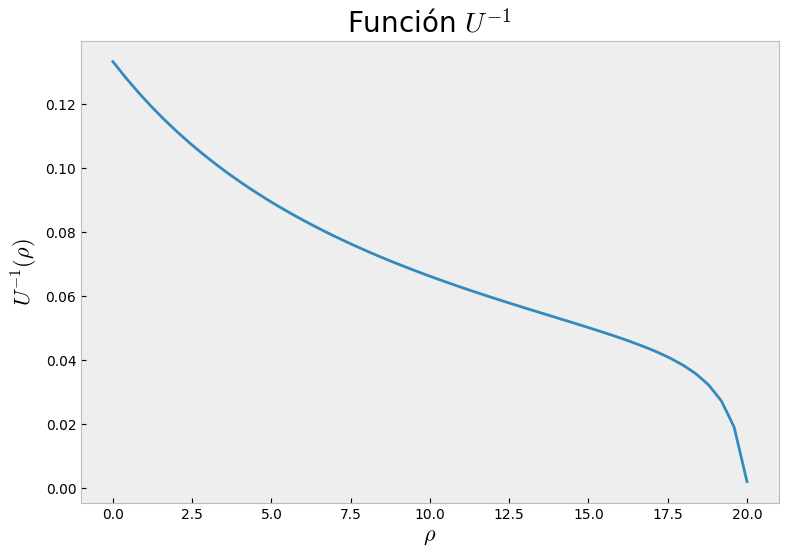

In [57]:
z_to_plot = np.linspace(u_max, 0, 100)
plt.plot(z_to_plot, U_inv(z_to_plot))
plt.title(r"Función $U^{-1}$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$U^{-1}(\rho)$")
plt.savefig("Charts/Funciones/U_inv.png")
plt.grid()
plt.show()

In [58]:
def Q_p_inv_points(z):
    z = float(z)
    Q_to_inv = lambda x: Q_prime(x)-z
    
    rho = root(Q_to_inv, 0.1*rho_max).x[0]
    return rho


zs = np.linspace(Q_prime(rhos).min(), u_max, 1000)
Q_p_inv_to_poly = [Q_p_inv_points(z) for z in zs]

Q_p_inv = interp1d(zs, Q_p_inv_to_poly)

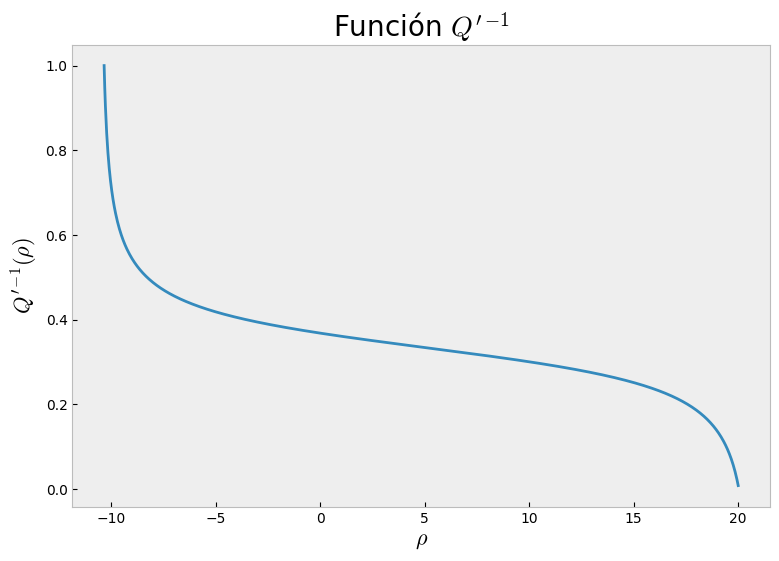

In [59]:
z_to_plot = np.linspace(Q_prime(rhos).min(), 20, 1000)
plt.plot(z_to_plot, Q_p_inv(z_to_plot)/rho_max)
plt.title(r"Función $Q'^{-1}$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$Q'^{-1}(\rho)$")
plt.savefig("Charts/Funciones/Q_prima_inv.png")
plt.grid()
plt.show()

# Construcción de jamitones

## Variables lagrangeanas

In [60]:
# Funciones del modelo
def h_bar(v):
    return h(1/v)

def h_bar_prime(v):
    output = -h_prime(1/v)/v**2 
    return output

def U_bar(v):
    return U(1/v)

def w_v(v, m, s):
    output = U_bar(v) - (m * v + s)
    return output

def r(v, m):
    output = m * h_bar(v) + m**2 * v
    return output

def r_prime(v, m):
    output = m * h_bar_prime(v) + m**2
    return output

def ode_jam_v(x, v, tau, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v * tau)
    return output

def ode_jam_v_eta(eta, v, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v)
    return output

In [61]:
# Mayor velocidad de onda posible
rho_s_zero = newton(lambda rho: U_prime(rho) + h_prime(rho), 0.2*rho_max)
v_s_zero = 1/rho_s_zero
m_max = -h_bar_prime(v_s_zero)
s_max = U_bar(v_s_zero) - m_max * v_s_zero
s_max

15.949188255975368

In [62]:
rho_s_values = np.linspace(0.3, 0.64, 20) * rho_max
for rho_s in rho_s_values:
    print("rho_s: ", round(rho_s/rho_max, 3))
    v_s = 1/rho_s
    m = -h_bar_prime(v_s)
    s = U_bar(v_s) - m * v_s
    w_ms = lambda v: w_v(v, m, s)
    v_M = root(w_ms, 50).x[0]
    print("Intervalo de v_-: ({v_s}, {v_M})".format(v_s=v_s, v_M=v_M))
    print("Largo intervalo: ", round(v_M-v_s, 3))

rho_s:  0.3
Intervalo de v_-: (25.0, 33.897441426341416)
Largo intervalo:  8.897
rho_s:  0.318
Intervalo de v_-: (23.592715231788084, 34.71223014741214)
Largo intervalo:  11.12
rho_s:  0.336
Intervalo de v_-: (22.335423197492165, 35.5071565446518)
Largo intervalo:  13.172
rho_s:  0.354
Intervalo de v_-: (21.205357142857146, 36.180345650443854)
Largo intervalo:  14.975
rho_s:  0.372
Intervalo de v_-: (20.18413597733711, 36.63323093604987)
Largo intervalo:  16.449
rho_s:  0.389
Intervalo de v_-: (19.256756756756758, 36.79757901401892)
Largo intervalo:  17.541
rho_s:  0.407
Intervalo de v_-: (18.410852713178294, 36.64723946335673)
Largo intervalo:  18.236
rho_s:  0.425
Intervalo de v_-: (17.636138613861387, 36.192654517341786)
Largo intervalo:  18.557
rho_s:  0.443
Intervalo de v_-: (16.92399049881235, 35.467308842254454)
Largo intervalo:  18.543
rho_s:  0.461
Intervalo de v_-: (16.267123287671232, 34.51469177577818)
Largo intervalo:  18.248
rho_s:  0.479
Intervalo de v_-: (15.65934065934

In [63]:
# Elección valores sónicos
rho_s = 0.43334728629845265 * rho_max #0.385 * rho_max # 0.64
v_s = 1/rho_s # Se necesita rho_s normalizado

m_bar = -h_bar_prime(v_s)
s_bar = U_bar(v_s) - m_bar * v_s

# Imprime parámetros
print("Velocidad jamiton: ", s_bar)
print("m= ", m_bar)

# Verifica que exista jamiton
jam_exs = U_prime(rho_s) + h_prime(rho_s) < 0
print("¿Existe jamiton? ",  jam_exs)

Velocidad jamiton:  6.350904643566894
m=  0.35667887686034183
¿Existe jamiton?  True


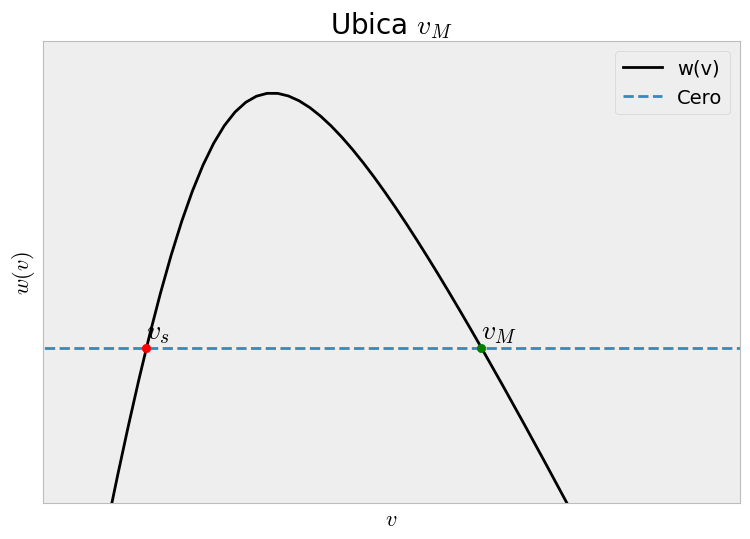

In [64]:
v_f = 600
texts = []
v_to_plot = np.linspace(8, v_f, 1000)#15, 50, 1000)#
plt.plot(v_to_plot, w_v(v_to_plot, m_bar, s_bar), label="w(v)", zorder=0, color="black")
plt.xlim(20, 37.5)
plt.ylim(-1, 0.5)

plt.hlines(0, 1, v_f, ls="--", label="Cero", zorder=1)
plt.scatter(v_s, w_v(v_s, m_bar, s_bar), color="red", zorder=2)
texts += [plt.annotate(r"$v_s$", (v_s, w_v(v_s, m_bar, s_bar)), fontsize=20)]

# jamiton maximal
v_M = newton(lambda v: w_v(v, m_bar, s_bar), 100)
plt.scatter(v_M, w_v(v_M, m_bar, s_bar), color="green", zorder=2)
texts += [plt.annotate(r"$v_M$", (v_M, w_v(v_M, m_bar, s_bar)), fontsize=20)]

plt.title(r"Ubica $v_M$")
plt.xlabel(r"$v$")
plt.ylabel(r"$w(v)$")
plt.legend()

plt.xlim(v_s/1.5, 1.4*v_M)
plt.ylim(w_v(v_s, m_bar, s_bar)-1.5, np.max(w_v(v_to_plot, m_bar, s_bar))+0.5)
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.tick_params(left = False , labelleft = False, 
                labelbottom = False, bottom = False)
plt.grid()
plt.savefig("Charts/Jamitones/encuentra_v_M.png")
plt.show()

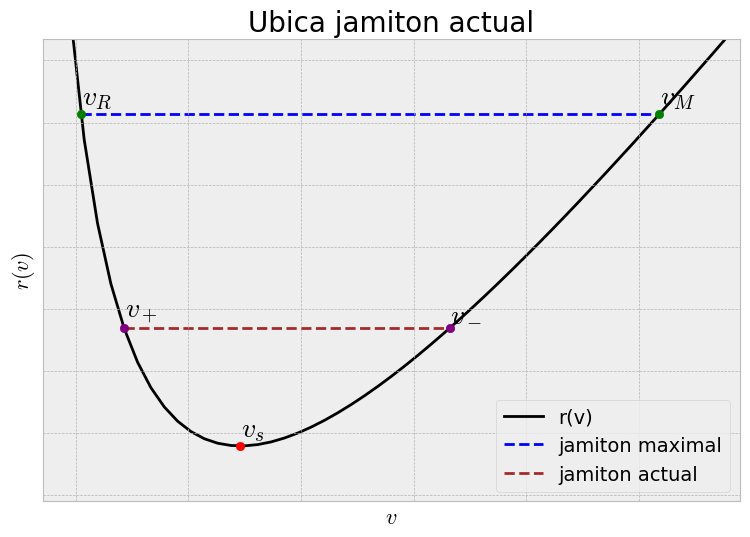

In [65]:
texts = []
plt.plot(v_to_plot, r(v_to_plot, m_bar), zorder=0, color="black", label="r(v)")

#plt.xlim(10, 40)
#plt.ylim(2.5, 3.5)

#plt.xlim(27.5, 32.5)
#plt.ylim(0.788, 0.795)

r_min = r(v_s, m_bar)
r_max = r(v_M, m_bar)

# Velocidad sonica
plt.scatter(v_s, r_min, color="red", zorder=2)
texts += [plt.annotate(r"$v_s$", (v_s, r_min), fontsize=20)]

# jamiton maximal
plt.scatter(v_M, r_max, color="green", zorder=2)
texts += [plt.annotate(r"$v_M$", (v_M, r_max), fontsize=20)]

v_R = root(lambda v: r(v, m_bar) - r_max, 10).x[0]#15)
plt.scatter(v_R, r(v_R, m_bar), color="green", zorder=2)
texts += [plt.annotate(r"$v_R$", (v_R, r(v_R, m_bar)), fontsize=20)]

# Linea de jamiton maximal
plt.hlines(r_max, v_R, v_M, color="blue", ls="--", label="jamiton maximal", zorder=1)

# Jamiton actual
v_minus = (v_M + v_s)/2#(v_M + v_s)/1.77#31
r_minus = r(v_minus, m_bar)
v_plus = newton(lambda v: r(v, m_bar) - r_minus, 8)
r_plus = r(v_plus, m_bar)

plt.scatter(v_minus, r_minus, color="purple", zorder=2)
texts += [plt.annotate(r"$v_-$", (v_minus, r_minus), fontsize=20)]

plt.scatter(v_plus, r_plus, color="purple", zorder=2)
texts += [plt.annotate(r"$v_+$", (v_plus, r_plus), fontsize=20)]

# Linea de jamiton actual
plt.hlines(r_minus, v_plus, v_minus, color="brown", ls="--", label="jamiton actual", zorder=1)

plt.title("Ubica jamiton actual")
plt.xlabel(r"$v$")
plt.ylabel(r"$r(v)$")

plt.xlim(v_R/1.2, v_M*1.1)
plt.ylim(r(v_s, m_bar)/1.05, r(v_R, m_bar)*1.05)

adjust_text(texts)

plt.tick_params(left = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.legend()

plt.savefig("Charts/Jamitones/encuentra_jamiton.png")
plt.show()

### Obtiene s en funcion de $v_-$ y $v_+$

In [66]:
def get_v_minus_plus(rho):
    rho_plus = np.max(rho)
    rho_minus = np.min(rho)
    
    v_plus = 1/rho_plus
    v_minus = 1/rho_minus
    
    return v_plus, v_minus

def get_m(v_plus, v_minus):
    num = h_bar(v_plus) - h_bar(v_minus)
    den = v_minus - v_plus
    m = num/den
    return m

def get_vs(m, v_minus, v_plus):
    v_mid = (v_minus + v_plus)/2
    v_s = newton(lambda v: h_bar_prime(v)+m, v_mid)
    return v_s

def get_s(m, v_s):
    s = U_bar(v_s) - m * v_s
    return s

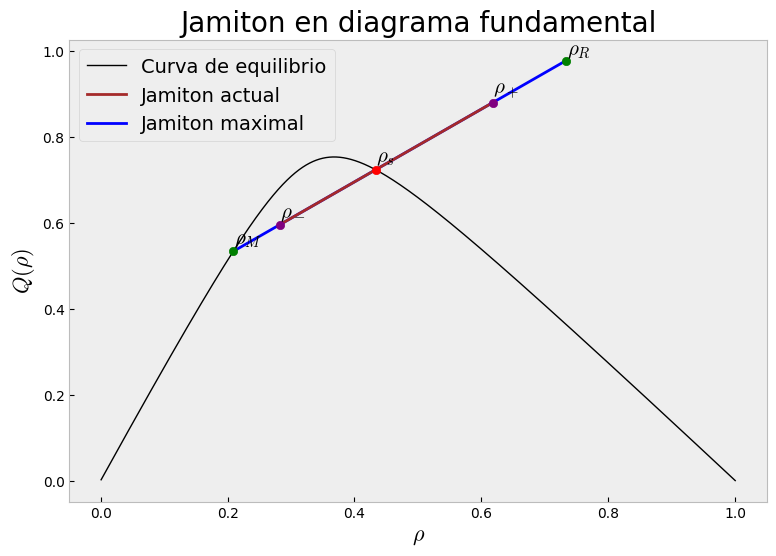

In [67]:
texts = []
# Diagrama fundamental
plt.plot(rhos/rho_max, Q_e(rhos), zorder=0, color="black", label="Curva de equilibrio", lw=1)
#plt.xlim(0.01, 0.1)
#plt.ylim(0.2, 1.5)

rho_plus = 1/v_plus
rho_minus = 1/v_minus
rho_M = 1/v_M
rho_R = 1/v_R

rho_s = 1/v_s

plt.scatter(rho_s/rho_max, Q_e(rho_s), color="red", zorder=3)
texts += [plt.annotate(r"$\rho_s$", (rho_s/rho_max, Q_e(rho_s)), fontsize=15)]

plt.scatter(rho_plus/rho_max, m_bar + s_bar * rho_plus, color="purple", zorder=3)
texts += [plt.annotate(r"$\rho_+$", (rho_plus/rho_max, m_bar + s_bar * rho_plus), fontsize=15)]
plt.scatter(rho_minus/rho_max, m_bar + s_bar * rho_minus, color="purple", zorder=3)
texts += [plt.annotate(r"$\rho_-$", (rho_minus/rho_max, m_bar + s_bar * rho_minus), fontsize=15)]

plt.scatter(rho_M/rho_max, m_bar + s_bar * rho_M, color="green", zorder=3)
texts += [plt.annotate(r"$\rho_M$", (rho_M/rho_max, m_bar + s_bar * rho_M), fontsize=15)]
plt.scatter(rho_R/rho_max,  m_bar + s_bar * rho_R, color="green", zorder=3)
texts += [plt.annotate(r"$\rho_R$", (rho_R/rho_max,  m_bar + s_bar * rho_R), fontsize=15)]

plt.plot([rho_plus/rho_max, rho_minus/rho_max], [m_bar + s_bar * rho_plus, m_bar + s_bar * rho_minus], color="brown", ls="-", 
         zorder=2, label="Jamiton actual")
plt.plot([rho_M/rho_max, rho_R/rho_max], [m_bar + s_bar * rho_M, m_bar + s_bar * rho_R], color="blue", ls="-", 
         zorder=1, label="Jamiton maximal")

plt.title("Jamiton en diagrama fundamental")
plt.ylabel(r"$Q(\rho)$")
plt.xlabel(r"$\rho$")
plt.legend()
#plt.tick_params(left = False , labelleft = False , 
#                labelbottom = False, bottom = False) 
adjust_text(texts)

plt.savefig("Charts/Jamitones/jam_diagrama.png")
plt.grid()
plt.show()

In [68]:
# Resuelve EDO
t_f = 200
sol_v = solve_ivp(ode_jam_v, (0, t_f), [v_R], t_eval=np.linspace(0, t_f, 10_000), args=[tau, m_bar, s_bar], dense_output=True)

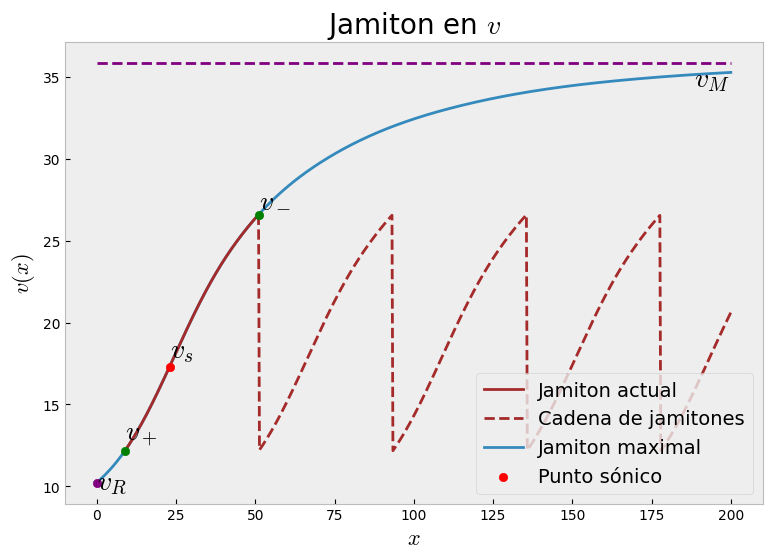

In [69]:
# Encuentra xs
x_minus = newton(lambda v: sol_v.sol(v)[0] - v_minus, 50)
x_plus = newton(lambda v: sol_v.sol(v)[0] - v_plus, 0)
x_s = newton(lambda v: sol_v.sol(v)[0] - v_s, 0)
x_to_plot = sol_v.t
x_to_per = np.linspace(x_minus, sol_v.t[-1], 500)

# Jamiton actual
x_jam = np.linspace(x_plus, x_minus, 500)
v_jam = sol_v.sol(x_jam)[0]

# Cadena de jamitones
def v_per(x):
    interval = x_plus - x_minus
    return sol_v.sol((x - x_minus) % interval + x_minus)[0]

texts = []
plt.plot(x_jam, v_jam, zorder=1, label="Jamiton actual", color="brown")
plt.plot(x_to_per, v_per(x_to_per), zorder=0, color="brown", ls="--", label="Cadena de jamitones")

plt.scatter(x_plus, sol_v.sol(x_plus)[0], zorder=2, color="green")
texts += [plt.annotate(r"$v_+$", (x_plus, sol_v.sol(x_plus)[0]), fontsize=20)]
plt.scatter(x_minus, sol_v.sol(x_minus)[0], zorder=2, color="green")
texts += [plt.annotate(r"$v_-$", (x_minus, sol_v.sol(x_minus)[0]), fontsize=20)]
plt.scatter(x_s, v_s, zorder=2, color="red", label="Punto sónico")
texts += [plt.annotate(r"$v_s$", (x_s, v_s), fontsize=20)]


# Jamiton maximal
plt.plot(x_to_plot, sol_v.y[0], zorder=0, label="Jamiton maximal")
plt.scatter(0, v_R, color="purple")
texts += [plt.annotate(r"$v_R$", (0, v_R), fontsize=20)]
plt.hlines(v_M, 0, t_f, color="purple", zorder=0, ls="--")
texts += [plt.annotate(r"$v_M$", (t_f, v_M), fontsize=20)]

#plt.xlim(-5, 42)
#plt.ylim(10, 40)
plt.title(r"Jamiton en $v$")
plt.xlabel(r"$x$")
plt.ylabel(r"$v(x)$")
plt.legend()
adjust_text(texts)

plt.grid()
plt.savefig("Charts/Jamitones/Jam_v.png")

plt.show()

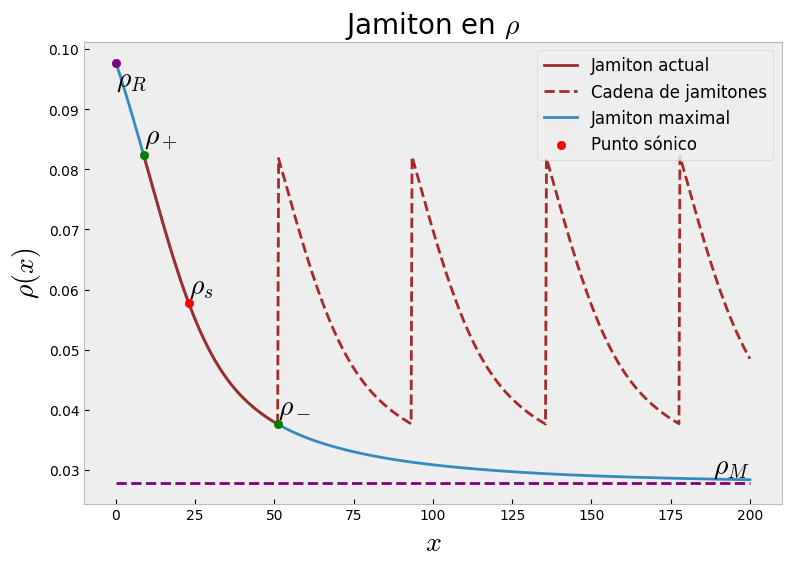

In [70]:
# Define densidad
sol_rho = lambda x: 1/sol_v.sol(x)[0]

# Jamiton actual
rho_jam = sol_rho(x_jam)
rho_y = 1/sol_v.y[0]

# Cadena de jamitones
def rho_per(x):
    interval = x_plus - x_minus
    return sol_rho((x - x_minus) % interval + x_minus)

texts = []
plt.plot(x_jam, rho_jam, zorder=1, label="Jamiton actual", color="brown")
plt.plot(x_to_per, rho_per(x_to_per), zorder=0, color="brown", ls="--", label="Cadena de jamitones")

plt.scatter(x_plus, sol_rho(x_plus), zorder=2, color="green")
texts += [plt.annotate(r"$\rho_+$", (x_plus, sol_rho(x_plus)), fontsize=20)]
plt.scatter(x_minus, sol_rho(x_minus), zorder=2, color="green")
texts += [plt.annotate(r"$\rho_-$", (x_minus, sol_rho(x_minus)), fontsize=20)]
plt.scatter(x_s, rho_s, zorder=2, color="red", label="Punto sónico")
texts += [plt.annotate(r"$\rho_s$", (x_s, rho_s), fontsize=20)]

# Jamiton maximal
plt.plot(x_to_plot, rho_y, zorder=0, label="Jamiton maximal")
plt.scatter(0, rho_R, color="purple")
texts += [plt.annotate(r"$\rho_R$", (0, rho_R), fontsize=20)]
plt.hlines(rho_M, 0, t_f, color="purple", zorder=0, ls="--")
texts += [plt.annotate(r"$\rho_M$", (t_f, rho_M), fontsize=20)]

plt.title(r"Jamiton en $\rho$")
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$\rho(x)$", fontsize=20)
plt.legend(fontsize=12)
adjust_text(texts)
plt.grid()

plt.savefig("Charts/Jamitones/jam_rho.png")
plt.show()

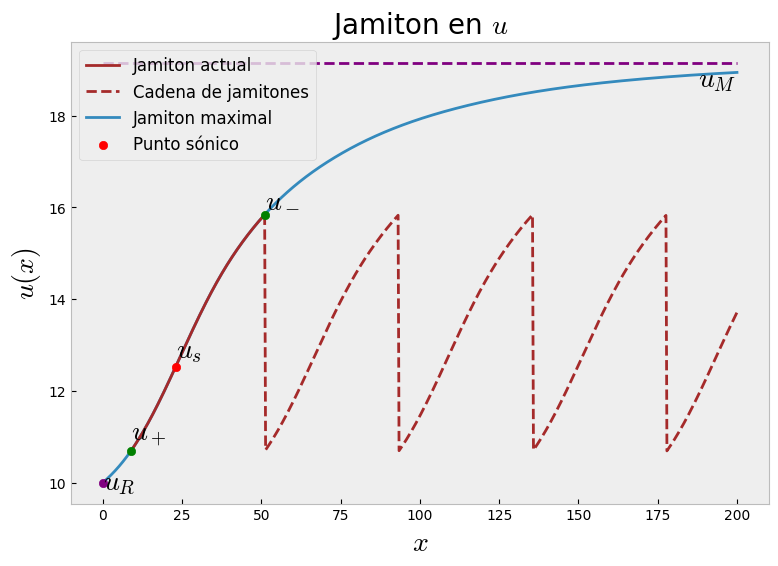

In [71]:
# Define velocidad
sol_u = lambda x: (m_bar/sol_rho(x)) + s_bar

# Jamiton actual
u_jam = sol_u(x_jam)
u_y = (m_bar/rho_y) + s_bar
u_s = (m_bar/rho_s) + s_bar
u_R = (m_bar/rho_R) + s_bar
u_M = (m_bar/rho_M) + s_bar

# Cadena de jamitones
def u_per(x):
    interval = x_plus - x_minus
    return sol_u((x - x_minus) % interval + x_minus)

texts = []
plt.plot(x_jam, u_jam, zorder=1, label="Jamiton actual", color="brown")
plt.plot(x_to_per, u_per(x_to_per), zorder=0, color="brown", ls="--", label="Cadena de jamitones")

plt.scatter(x_plus, sol_u(x_plus), zorder=2, color="green")
texts += [plt.annotate(r"$u_+$", (x_plus, sol_u(x_plus)), fontsize=20)]
plt.scatter(x_minus, sol_u(x_minus), zorder=2, color="green")
texts += [plt.annotate(r"$u_-$", (x_minus, sol_u(x_minus)), fontsize=20)]
plt.scatter(x_s, u_s, zorder=2, color="red", label="Punto sónico")
texts += [plt.annotate(r"$u_s$", (x_s, u_s), fontsize=20)]

# Jamiton maximal
plt.plot(x_to_plot, u_y, zorder=0, label="Jamiton maximal")
plt.scatter(0, u_R, color="purple")
texts += [plt.annotate(r"$u_R$", (0, u_R), fontsize=20)]
plt.hlines(u_M, 0, t_f, color="purple", zorder=0, ls="--")
texts += [plt.annotate(r"$u_M$", (t_f, u_M), fontsize=20)]

plt.title(r"Jamiton en $u$")
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$u(x)$", fontsize=20)
plt.legend(fontsize=12)
adjust_text(texts)
plt.grid()

plt.savefig("Charts/Jamitones/jam_u.png")
plt.show()

In [72]:
# Funciones del modelo
def h_bar(v):
    return h(1/v)

def h_bar_prime(v):
    output = -h_prime(1/v)/v**2 
    return output

def U_bar(v):
    return U(1/v)

def w_v(v, m, s):
    output = U_bar(v) - (m * v + s)
    return output

def r(v, m):
    output = m * h_bar(v) + m**2 * v
    return output

def r_prime(v, m):
    output = m * h_bar_prime(v) + m**2
    return output

def ode_jam_v(x, v, tau, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v * tau)
    return output

def ode_jam_v_eta(eta, v, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v)
    return output

In [73]:
# Transforma v a rho
def v_to_rho(v):
    rho = 1/v
    return rho

# Transforma rho a u
def rho_to_u(rho, m, s):
    u = (m/rho) + s
    return u


def jam_gen(rho_s, v_minus, tau):
    rho_s *= rho_max
    v_s = 1/rho_s

    values_v = {}
    values_rho = {}
    values_u = {}

    # Parámetros del jamiton
    m = -h_bar_prime(v_s)
    s = U_bar(v_s) - m * v_s

    # Existencia jamiton
    jam_exs = U_prime(v_to_rho(v_s)) + h_prime(v_to_rho(v_s)) < 0
    if not jam_exs:
        print("No existe jamiton, pruebe otro valor de rho_s")
        pass

    # Jamiton maximal
    v_M = newton(lambda v: w_v(v, m, s), 40)
    v_R = newton(lambda v: r(v, m) - r(v_M, m), 10)

    # Jamiton actual
    v_plus = newton(lambda v: r(v, m) - r(v_minus, m), 8)

    # Guarda valores de v
    values_v["v_s"] = v_s
    values_v["v_M"] = v_M
    values_v["v_R"] = v_R
    values_v["v_minus"] = v_minus
    values_v["v_plus"] = v_plus

    # Guarda valores de rho
    values_rho["rho_s"] = v_to_rho(v_s)
    values_rho["rho_M"] = v_to_rho(v_M)
    values_rho["rho_R"] = v_to_rho(v_R)
    values_rho["rho_minus"] = v_to_rho(v_minus)
    values_rho["rho_plus"] = v_to_rho(v_plus)

    # Guarda valores de u
    values_u["u_s"] = rho_to_u(values_rho["rho_s"], m, s)
    values_u["u_M"] = rho_to_u(values_rho["rho_M"], m, s)
    values_u["u_R"] = rho_to_u(values_rho["rho_R"], m, s)
    values_u["u_minus"] = rho_to_u(values_rho["rho_minus"], m, s)
    values_u["u_plus"] = rho_to_u(values_rho["rho_plus"], m, s)

    # Solucion EDO
    t_f = 6_000
    sol_v = solve_ivp(ode_jam_v, (0, t_f), [v_R], t_eval=np.linspace(0, t_f, 10_000), args=[tau, m, s], dense_output=True)
    sol_rho = lambda x: v_to_rho(sol_v.sol(x)[0])
    sol_u = lambda x: rho_to_u(sol_rho(x), m, s)
    
    return values_v, values_rho, values_u, sol_v, sol_rho, sol_u, m, s

In [74]:
rho_s_1 = 0.515
rho_s_2 = 0.551
v_minus = 20
tau = 5
x_init = 90
values_v_1, values_rho_1, values_u_1, sol_v_1, sol_rho_1, sol_u_1, m_1, s_1 = jam_gen(rho_s_1, v_minus, tau)
values_v_2, values_rho_2, values_u_2, sol_v_2, sol_rho_2, sol_u_2, m_2, s_2 = jam_gen(rho_s_2, v_minus, tau)

x_minus_1 = newton(lambda x: sol_v_1.sol(x)[0] - v_minus, x_init)
x_plus_1 = newton(lambda x: sol_v_1.sol(x)[0] -  values_v_1["v_plus"], 0)

x_minus_2 = newton(lambda x: sol_v_2.sol(x)[0] - v_minus, x_init)
x_plus_2 = newton(lambda x: sol_v_2.sol(x)[0] -  values_v_2["v_plus"], 0)

In [75]:
x_minus_1, x_minus_2

(114.32593278080633, 223.7006131266438)

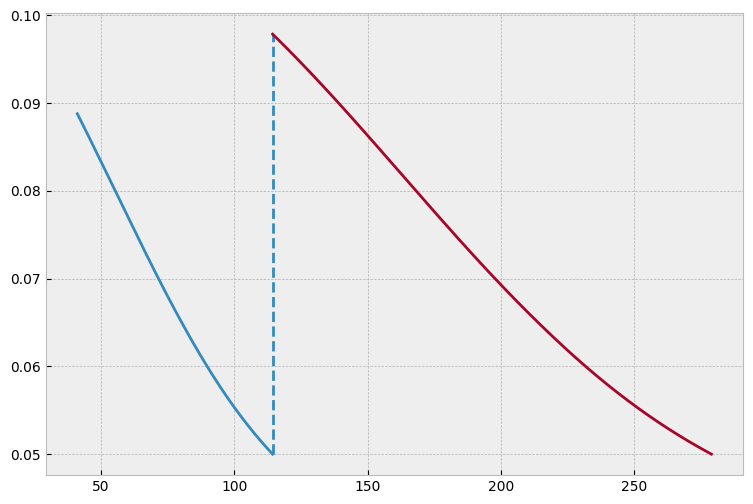

In [76]:
x_to_plot_1 = np.linspace(x_plus_1, x_minus_1, 1000)
x_to_plot_2 = np.linspace(x_plus_2, x_minus_2, 1000)

plt.plot(x_to_plot_1, sol_rho_1(x_to_plot_1))
plt.plot(x_to_plot_2+(x_minus_1-x_plus_2), sol_rho_2(x_to_plot_2))
plt.vlines(x_to_plot_1[-1], sol_rho_1(x_to_plot_1[-1]), sol_rho_2(x_to_plot_2[0]), ls="--")
plt.show()

In [77]:
x_minus_2

223.7006131266438

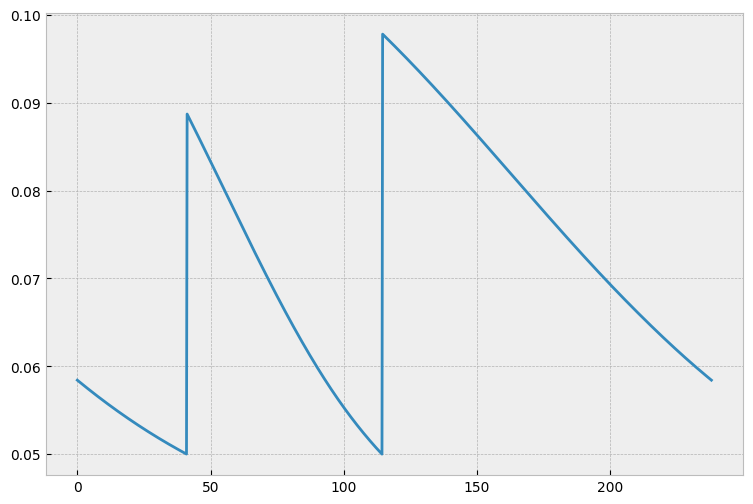

In [78]:
x_to_plot = np.linspace(0, x_minus_2+(x_minus_1 - x_plus_2) - x_plus_1, 1000)

def sol_final(x):
    if x_plus_1 <= x and x <= x_minus_1:
        return sol_rho_1(x)
    
    elif x_plus_2 <= x - (x_minus_1 - x_plus_2) and x - (x_minus_1 - x_plus_2) <= x_minus_2:
        return sol_rho_2(x-(x_minus_1 - x_plus_2))
sol_final = np.vectorize(sol_final)

def sol_per(x):
    interval = x_minus_2+(x_minus_1 - x_plus_2) - x_plus_1
    x_per = (x - x_plus_1) % interval + x_plus_1
    return sol_final(x_per)


plt.plot(x_to_plot, sol_per(x_to_plot))

In [79]:
sol_final(x_to_plot[-1])

array(0.05842148)

### Solución analítica

In [80]:
def ode_jam_v_eta(eta, v, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v)
    return output

In [81]:
rho_s_test = 0.64
v_minus_test = 13
tau = 5

values_v_test, values_rho_test, values_u_test, sol_v_test, sol_rho_test, sol_u_test, m_test, s_test = jam_gen(rho_s_test, v_minus_test, tau)
v_R_test = values_v_test["v_R"]
sol_v_eta_test = solve_ivp(ode_jam_v_eta, (0, 6_000), [v_R_test], t_eval=np.linspace(0, 6000, 10_000), args=[m_test, s_test], dense_output=True)
sol_rho_eta_test = lambda eta: v_to_rho(sol_v_eta_test.sol(eta)[0])
sol_u_eta_test = lambda eta: rho_to_u(sol_rho_eta_test(eta), m_test, s_test)

eta_minus_test = newton(lambda x: sol_v_eta_test.sol(x)[0] - v_minus_test, 250)
eta_plus_test = newton(lambda x: sol_v_eta_test.sol(x)[0] -  values_v_test["v_plus"], 0)

In [82]:
def teo_rho_per(x, t, s):
    eta = (x - s*t)/tau
    interval = eta_minus_test - eta_plus_test
    eta_per = (eta - eta_plus_test) % interval + eta_plus_test
    
    return sol_rho_eta_test(eta_per)

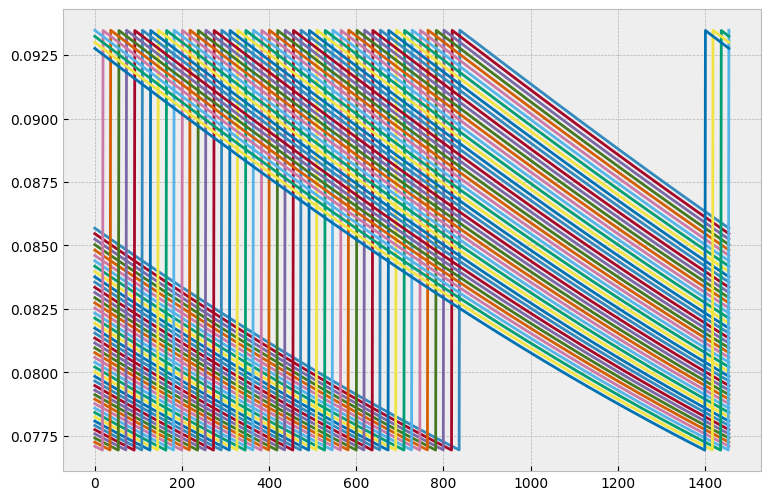

In [83]:
x_minus_test = eta_minus_test * tau
x_plus_test = eta_plus_test * tau
x_to_plot = np.linspace(0, x_minus_test - x_plus_test, 1000)

for t in range(0, 100, 2):
    plt.plot(x_to_plot, teo_rho_per(x_to_plot, t, s_test))

plt.show()

In [84]:
x_minus_test = eta_minus_test * tau
x_plus_test = eta_plus_test * tau
x_to_plot_test = np.linspace(x_plus_test, x_minus_test, 1000)

eta_to_plot_test = np.linspace(eta_plus_test, eta_minus_test, 1000)

## Envoltura jamiton maximal

### Obtiene $\rho_s$ candidatos

In [85]:
rho_min_scc = root(lambda rho: U_prime(rho) + h_prime(rho), 0.1*rho_max, method="lm").x[0]
rho_max_scc = root(lambda rho: U_prime(rho) + h_prime(rho), 0.7*rho_max, method="lm").x[0]

rhos_violate = np.linspace(rho_min_scc+0.0001, rho_max_scc-0.0001, 25)

In [86]:
v_violate = 1/rhos_violate # Se necesita rho_s normalizado

m_violate = -h_bar_prime(v_violate)
s_violate = U_bar(v_violate) - m_violate * v_violate

In [87]:
v_M_s = []
v_R_s = []
for i in range(len(v_violate)):
    w_ms = lambda v: w_v(v, m_violate[i], s_violate[i])
    v_M = root(w_ms, 100).x[0]
    v_M_s += [v_M]
    
    r_max = r(v_M, m_violate[i])
    v_R = root(lambda v: r(v, m_violate[i]) - r_max, 8, method="lm").x[0]
    v_R_s += [v_R]

v_M_s = np.array(v_M_s)
v_R_s = np.array(v_R_s)

In [88]:
zero = np.real(root(U,rho_max-1e-4).x[0])
rhos = np.linspace(0, zero, 1_000)

In [89]:
def h_two_prime(rho):
    output_1 = beta * gamma * (gamma - 1) * (rho/(rho_max - rho))**(gamma - 2)
    output_2 = 2 * beta * gamma * (rho/(rho_max - rho))**(gamma - 1) * (rho_max / ((rho_max - rho)**3))
    return output_1 + output_2

def m_prime(rho):
    output = -rho * (2 * h_prime(rho) + rho * h_two_prime(rho))
    return output

def s_prime(rho):
    output = (h_prime(rho) + rho * h_two_prime(rho)) - U_prime(rho)
    return output

In [90]:
rho_bar = -m_prime(rhos_violate)/s_prime(rhos_violate)
Q_bar = rhos_violate**2 * h_prime(rhos_violate) + rho_bar * (U(rhos_violate) - rhos_violate * h_prime(rhos_violate))

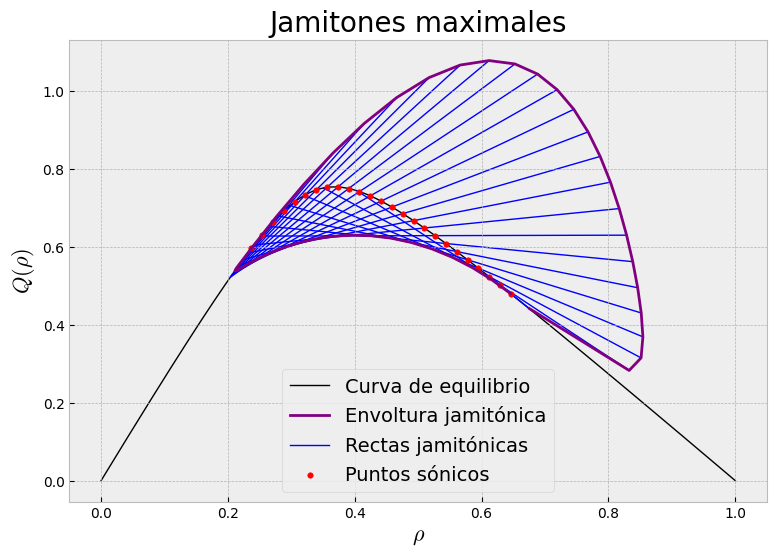

In [91]:
# Diagrama fundamental


plt.plot(rhos/rho_max, Q_e(rhos), zorder=0, color="black", label="Curva de equilibrio", lw=1)
#plt.xlim(0.01, 0.1)
#plt.ylim(0.2, 1.5)

rho_M_s = 1/v_M_s
rho_R_s = 1/v_R_s

#rho_s = 1/v_s

plt.scatter(rhos_violate/rho_max, Q_e(rhos_violate), color="red", zorder=3, s=15, label="Puntos sónicos")


#plt.plot(rho_M_s/rho_max, m_violate + s_violate * rho_M_s, color="purple", zorder=3, label="Envoltura jamitónica")
plt.plot(rho_R_s/rho_max,  m_violate + s_violate * rho_R_s, color="purple", zorder=3)
plt.plot(rho_bar/rho_max,  Q_bar, color="purple", zorder=3, label="Envoltura jamitónica")


lines = plt.plot([rho_M_s/rho_max, rho_R_s/rho_max], [m_violate + s_violate * rho_M_s, m_violate + s_violate * rho_R_s], color="blue", lw=1, 
         zorder=1, label="Rectas jamitónicas")

plt.setp(lines[1:], label="_")

plt.title("Jamitones maximales")
plt.ylabel(r"$Q(\rho)$")
plt.xlabel(r"$\rho$")
plt.legend()
#plt.tick_params(left = False , labelleft = False , 
#                labelbottom = False, bottom = False) 

plt.savefig("Charts/Jamitones/Jam_max.png")
plt.show()